### 雷达文件比自动站文件快8个小时，比如自动站文件为20160720123000，则对应的雷达文件为20160720043000

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import datetime
import gzip
import os
import warnings

warnings.filterwarnings('ignore')


In [22]:
# # 统计文件数量 自动站
# data_path = r"\\192.168.1.240\data2\AWS\AWS\ALL_M5M9"
# file_list = os.listdir(data_path)
# day_dict = {}

# for idx in range(len(file_list)):
#     if file_list[idx]:
# #         _day = file_list[idx][:8]
#         _day = file_list[idx][6:14]
#         if _day not in day_dict.keys():
#             day_dict[_day] = 0
#         else:
#             day_dict[_day] +=1
# day_list_all = list(day_dict.keys())

In [23]:
# # 统计文件数量 雷达
# data_path = r"\\192.168.1.240\data2\BJANC_RENAME"
# # data_path = r"\\192.168.1.240\data2\AWS\AWS\ALL_M5M9"
# file_list = os.listdir(data_path)
# day_dict = {}

# for idx in range(len(file_list)):
#     if file_list[idx]:
#         _day = file_list[idx][:8]
#         if _day not in day_dict.keys():
#             day_dict[_day] = 0
#         else:
#             day_dict[_day] +=1
# print(day_dict)

In [24]:
# 对应关系
# day_dict_all = {}
# for k in day_list_all:
#     try:
#         day_dict_all[k] = day_dict[k]
#     except:
#         day_dict_all[k] = 0
# print(day_dict_all)

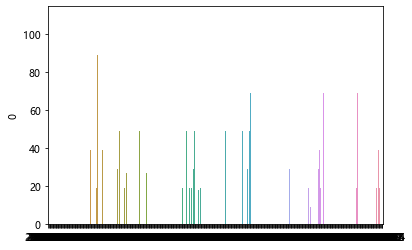

In [35]:
# -*- coding: utf-8 -*-
import pandas as pd
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']#指定默认字体
mpl.rcParams['axes.unicode_minus'] =False # 解决保存图像是负号'-'显示为方块的问题
import seaborn as sns

data_df = pd.DataFrame(pd.Series(day_dict_all))
# data_df
sns.barplot(x=data_df.index, y=data_df[0], data=data_df)


In [47]:
# 计算数据缺失量
max_num_act = max(list(day_dict_all.values()))
max_num = 24*60/6
days_all = len(day_dict_all.keys())
se_num = max_num  * days_all
r_num = max_num_act * days_all

act_num = sum(list(day_dict_all.values()))
print("理论数据缺失率为 ",1-act_num/se_num)
print("实际数据缺失率为 ",1-act_num/r_num)

理论数据缺失率为  0.9802607585703865
实际数据缺失率为  0.9565374500632365


In [68]:
data_path = r"\\192.168.1.240\data2\BJANC_RENAME"
g_file = gzip.GzipFile(os.path.join(data_path,"20160812010000.nc.gz"))
data = xr.open_dataset(g_file)
data

<xarray.Dataset>
Dimensions:  (X: 800, Y: 800, height: 20, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-08-12T01:05:33
  * height   (height) float32 0.5 1.5 2.5 3.5 4.5 ... 15.5 16.5 17.5 18.5 19.5
  * Y        (Y) float32 -400.0 -399.0 -398.0 -397.0 ... 396.0 397.0 398.0 399.0
  * X        (X) float32 -400.0 -399.0 -398.0 -397.0 ... 396.0 397.0 398.0 399.0
Data variables:
    DBZ      (time, height, Y, X) float32 ...
Attributes:
    history:      Generated from MDV file, M.X.Chen, BMB/IUM
    Conventions:  COARDS
    FileOrigins:  File /d1/fieldData/beijing/NetCDF/20160812_010533_bjanc_mer...
    DataTime:     2016/08/12 01:05:33
    Year:         2016.0
    Month:        8.0
    Day:          12.0
    Hour:         1.0
    Minute:       5.0
    Second:       33.0
    UNIX_Time:    1470964000.0
    OriginX:      116.47195
    OriginY:      39.808887

In [69]:
grid = np.load(r"D:\Python\radar_data\Deal_awsData\read_station_model\aws_idw\radar_beijing.npy")[::,400:600,300:500]
lon_grid,lat_grid = grid[0],grid[1]
grid.shape

(2, 200, 200)

In [70]:
dbz = data.DBZ.data.squeeze()
max_dbz_x = np.nanmax(dbz,axis=2)[400:600,300:500]
max_dbz_y = np.nanmax(dbz,axis=1)[400:600,300:500]
max_dbz_z = np.nanmax(dbz,axis=0)[400:600,300:500]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: All-NaN slice encountered
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: All-NaN slice encountered
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: All-NaN slice encountered
  after removing the cwd from sys.path.


In [71]:
dbz.shape

(20, 800, 800)

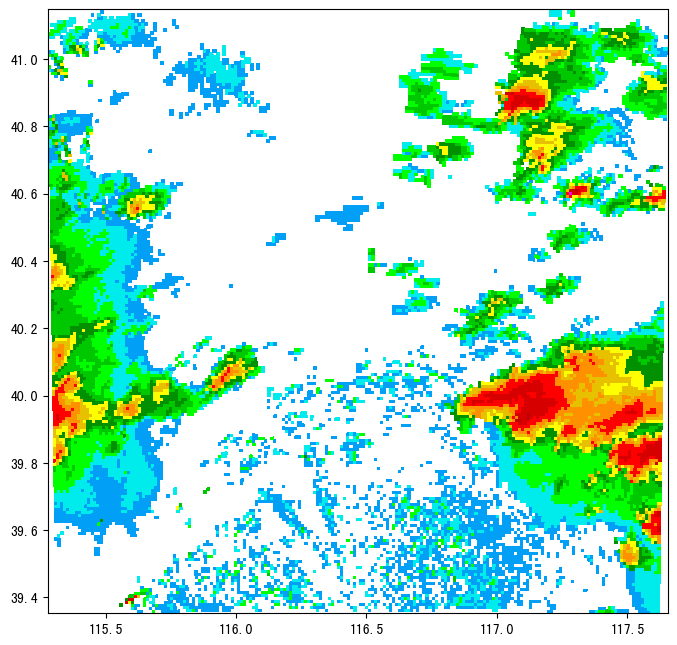

In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
fig = plt.figure(figsize=(8,8),dpi=100)
colors = ['white', '#01a0f6', '#00ecec', '#01ff00','#00c800','#019000','#ffff00',
          '#e7c000','#ff9000','#ff0000','#d60000','#c00000', '#ff00f0','#780084','#ad90f0']
levels = [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0]

# colors = ('#99f8ff', '#65efff', '#32e3ff', '#00a9cc', '#007a99', '#99ccff',
#               '#7399ff', '#4d66ff', '#274dd9', '#0033b3', '#005892', '#008073',
#               '#008c39', '#009900', '#1ea61e', '#40b340', '#81cd43', '#c2e846',
#               '#ffee00', '#ffdf01', '#ffc425', '#ffa84c', '#ff8834', '#fd681a',
#               '#f3470d', '#e62600', '#d21300', '#990000', '#9933cc', '#8e28b7',
#               '#7a148e', '#660066', '#d8af97', '#bc967d', '#a17d64', '#85644b',
#               '#6a4b32', '#4e3219')
# levels = [0.01, 0.2, 0.4, 0.6, 0.8, 1, 2, 3, 4, 5, 7, 9, 11, 13, 15, 17, 19,
#                   21, 23, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 60, 65, 70,
#                   75, 80, 85, 90, 95, 100]


# plt.contourf(dbz,levels=levels,colors = colors)
# plt.contourf(flag)

# cmap = plt.get_cmap('PiYG')
cmap = ListedColormap(colors)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(lon_grid,lat_grid,max_dbz_z,cmap=cmap,norm=norm)
plt.show()


In [61]:
max_dbz_z.shape

(200, 200)

In [86]:
fromtime = "20160812010000"
endtime = "20160812075400"

grid = np.load(r"D:\Python\radar_data\Deal_awsData\read_station_model\aws_idw\radar_beijing.npy")[::,400:600,300:500]
lon_grid,lat_grid = grid[0],grid[1]
from_time = datetime.datetime.strptime(fromtime, '%Y%m%d%H%M%S')
end_time = datetime.datetime.strptime(endtime, '%Y%m%d%H%M%S')
periods = int((end_time - from_time).total_seconds() / 360) + 1
# print(periods)
timeindex6m = [datetime.datetime.strftime(i, '%Y%m%d%H%M%S') for i in
                   pd.date_range(fromtime, periods=periods, freq="360s")]
data_path = r"\\192.168.1.240\data2\BJANC_RENAME"
for timestamp in timeindex6m:
    _file = os.path.join(data_path,f"{timestamp}.nc.gz")
    if os.path.exists(_file):
        nc_data = xr.open_dataset(gzip.GzipFile(_file))
        dbz = nc_data.DBZ.data.squeeze()
        #max_dbz_x = np.nanmax(dbz,axis=2)[400:600,300:500]
        #max_dbz_y = np.nanmax(dbz,axis=1)[400:600,300:500]
        max_dbz_z = np.nanmax(dbz,axis=0)[400:600,300:500]
        np.save(r"D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\{}.npy".format(timestamp),max_dbz_z)
        print("save success")


save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success
save success


In [92]:
os.chdir(r"D:\Python\radar_data\Deal_awsData\read_station_model")

import os
import datetime
import sys
import gc
import numpy as np
import xarray as xr
import models
import datetime
from scipy import ndimage
import matplotlib.pyplot as plt
from utils import get_attr
from Const import QPE_DATA, OUTPUT_QPE, OUTPUT_QPENPY,OUTPUT_DBZ
from matplotlib.colors import ListedColormap, BoundaryNorm

import warnings

warnings.filterwarnings('ignore')

LEFT_LON = 112.87187
RIGHT_LON = 119.90312
LEFT_LAT = 37.51319
RIGHT_LAT = 42.87916
HEIGHT_TOP = None
HEIGHT_BOM = None
levels = [0.01, 0.2, 0.4, 0.6, 0.8, 1, 2, 3, 4, 5, 7, 9, 11, 13, 15, 17, 19,
          21, 23, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 60, 65, 70,
          75, 80, 85, 90, 95, 100]
colors = ('#99f8ff', '#65efff', '#32e3ff', '#00a9cc', '#007a99', '#99ccff',
          '#7399ff', '#4d66ff', '#274dd9', '#0033b3', '#005892', '#008073',
          '#008c39', '#009900', '#1ea61e', '#40b340', '#81cd43', '#c2e846',
          '#ffee00', '#ffdf01', '#ffc425', '#ffa84c', '#ff8834', '#fd681a',
          '#f3470d', '#e62600', '#d21300', '#990000', '#9933cc', '#8e28b7',
          '#7a148e', '#660066', '#d8af97', '#bc967d', '#a17d64', '#85644b',
          '#6a4b32', '#4e3219')


def calc_qpe(dbz):
    tmpdbz2 = np.nanmean(dbz[20:30], axis=0)
    Rsim = (10 ** (tmpdbz2 / 10) / 200) ** (5 / 8)
    return Rsim


def run(currnc, prevnc, save_root):
    # ctime = os.path.splitext(os.path.split(currnc)[1])[0]
    if (not os.path.exists(currnc)) or (not os.path.exists(prevnc)):
        return
    rect = [0, 0, 1.0, 1.0]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_axes(rect)
#     cdbz, lon, lat, hgt = get_attr(currnc)
#     pdbz, lon, lat, hgt = get_attr(prevnc)
#     cqpe = calc_qpe(cdbz)
#     pqpe = calc_qpe(pdbz)
    # save_troot = os.path.join(save_root, ctime)

    cqpe = np.load(currnc)
    pqpe = np.load(prevnc)
    save_path = os.path.join(OUTPUT_DBZ,'qpf_img', f'{ctime[:-2]}_QPE.png')
    # if not os.path.exists(save_troot):
    #     os.makedirs(save_troot)
    # ax.contourf(cqpe, levels=levels, colors=colors)
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    img1 = ax.pcolormesh(cqpe, cmap=cmap, norm=norm)
    plt.grid()
    fig.colorbar(img1)
    plt.savefig(save_path)
    # plt.cla()
    dense = models.Dense()

    dense.input_data = np.array([pqpe, cqpe])
    # print(pqpe.shape)
    # print(cqpe.shape)
    # 前后两个时间的时间间隔
    # dense.interval = 2
    dense.interval = 12
    # 外推的时间
    dense.sum_time = 60
    dense.lead_steps = 1
    dense.of_method = 'PCAFlow'
    newcast = dense.run()
    # print(newcast.shape[0])
    # for j in range(newcast.shape[0]):
    ax.pcolormesh(newcast[0], cmap=cmap, norm=norm)
    # ax.contourf(newcast[j], colors=colors, levels=levels)
    plt.axis('off')
    fig_path = os.path.join(OUTPUT_DBZ,'qpf_img',
                             f'{ctime[:-2]}_QPF_{str((1)*int(dense.sum_time/dense.lead_steps)).rjust(2, "0")}.png')
    ptime = datetime.datetime.strftime(
        datetime.datetime.strptime(ctime[:-2], '%Y%m%d%H%M') + datetime.timedelta(minutes=dense.sum_time), '%Y%m%d%H%M')
    # # print(time1)
    save_path = os.path.join(OUTPUT_DBZ,'qpf_npy',
                             f'{ptime[:-2]}.npy')
    plt.grid()
    np.save(save_path, newcast[0])
    plt.savefig(fig_path)
    # plt.close('all')
    plt.close(fig)
    gc.collect()
    # print("finish")
    # return


if __name__ == '__main__':
    # nc_root = r'.\20190826'
    # save_root = r'.\output_qpe'
    data_root = os.path.join(OUTPUT_DBZ, 'dbz_npy')
    for i in os.listdir(data_root):
        try:
            curr_path = os.path.join(data_root, i)
            # print(curr_path)
            ctime = os.path.splitext(os.path.split(curr_path)[1])[0]
            cdtime = datetime.datetime.strptime(ctime, '%Y%m%d%H%M%S')
            ptime = (cdtime - datetime.timedelta(minutes=12)).strftime('%Y%m%d%H%M%S')
            # print(ptime)
            prev_path = os.path.join(data_root, f'{ptime}.npy')
            print(prev_path, curr_path)
            # break
            run(curr_path, prev_path, OUTPUT_DBZ)
        except Exception as e:
            print(e)


D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812004800.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812010000.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812005400.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812010600.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812010000.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812011200.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812010600.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812011800.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812011200.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812012400.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812011800.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812013000.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812012400.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812013

D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812063000.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812064200.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812063600.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812064800.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812064200.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812065400.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812064800.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812070000.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812065400.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812070600.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812070000.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812071200.npy
D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812070600.npy D:\Python\radar_data\Deal_awsData\output_dbz\dbz_npy\20160812071

In [95]:
import datetime as dateTime
timenow = (dateTime.datetime.utcnow() + dateTime.timedelta(hours=8))
year = str(timenow.strftime('%Y'))
year_2 = year[-2:]
month = str(timenow.strftime('%m'))
day = str(timenow.strftime('%d'))
# day = '26'

time_ = str(timenow.strftime('%H'))
if int(time_) >= 7 and int(time_) <= 19:
    _time = '08'
else:
    if int(time_) >= 0 and int(time_) < 7:
        timenow = (dateTime.datetime.utcnow() + dateTime.timedelta(hours=8))
        datetime_deal = timenow - dateTime.timedelta(days=1)
        year = str(datetime_deal.strftime('%Y'))
        year_2 = year[-2:]
        month = str(datetime_deal.strftime('%m'))
        day = str(datetime_deal.strftime('%d'))
    _time = '20'

# _time = "08"
hour = _time + "00"
timestamp = "%s%s%s%s" % (year, month, day, hour)
print(timestamp)

202004010800
